# Multi Layer Perceptron from scratch

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Helper method to plot neural network
import matplotlib.pyplot as plt
import draw_neural_network

## Load and prepare data [Classification]

In [3]:
clf_df = pd.read_csv("Iris.csv")
clf_df = clf_df.drop("Id", axis=1)
clf_df = clf_df.rename(columns={"species": "label"})

In [4]:
clf_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
clf_X_df = clf_df.iloc[:, :-1]
clf_y_df = clf_df.iloc[:, -1]

In [6]:
clf_X_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
clf_y_df.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: label, dtype: object

##TODO: 
Setup:
Input:
- batch (as seperate argument) full/minibatch
- sgd single/minibatch (random)
Output:
- output labelencoder
- save actual labels

Loss functions:
- relu
- relu derivative
- softmax
- softmax derivative


forward propagation:
- iterative until final layer

loss computation:
- binary_crossentropy
- categorical_crossentropy

back propagation:
- chain builder - Parameter respective,for each training example, negative gradient

parameter update:
- average derivative respective to each parameter for all training examples
- update old weights by adding 

## Algorithm

In [8]:
class MutliLayerPerceptronClassifer():
    def __init__(self):
        # RNG seed
        np.random.seed(20)
        # network config vars
        self.layers_config = []
        self.network_structure = None
        self.loss_function = None
        self.optimizer = None
        
        self.supported_network_settings = {
            "activation": ["sigmoid", "relu", "softmax"],
            "loss": ["binary_crossentropy", "categorical_crossentropy"],
            "optimizer": ["sgd"]
        }
        
    def add_layer(self, units, activation="relu", input_units=None):
        # Validate activation value
        self.validate_settings(setting_type="activation", setting_value=activation)
        
        layers_count = len(self.layers_config)
        # check if this is the first layer 
        if (layers_count == 0):
            if (input_units == None):
                # We need input_dim as this is the first hidden layer
                raise Exception("Please specify parameter value for 'input_units'(eg: input_units=4), as this is the first hidden layer")
            else:
                # First create the input layer
                self.layers_config.append((layers_count, input_units, None))
                # Next add the hidden layer
                self.layers_config.append((layers_count+1, units, activation))
        else:  
            self.layers_config.append((layers_count+1, units, activation))
    
    def sigmoid_activation(self, z):
        # Plain and simple sigmoid function, function returns prob for z(z is weighted sum of input)
        return 1 / (1 + np.exp(-z))
    
    
    def sigmoid_derivative(self, sig_z): # sig_z = sig(w.a + b) (vectors w,a represent weight,activations)
        # Differentiate sigmoid function w.r.t to z to obtain sig_z * (1 - sig_z)
        return sig_z * (1 - sig_z)
    
    
    def standardizer(self, x): # Normalize with mean 0 and std-dev of 1, also called z-score 
        x_mean = np.mean(x, axis=0)
        x_std = np.std(x, axis=0)
        stdz_x = np.divide((x - x_mean), x_std, where=x_std!=0)
        return stdz_x
    
    def validate_settings(self, setting_type, setting_value):
        if setting_value not in self.supported_network_settings[setting_type]:
            raise Exception(f"{setting_type}='{setting_value}' is not supported, please specify {setting_type} as any one from the following list {self.supported_network_settings[setting_type]}")
        
    
    def compile_network(self, loss, optimizer=None, batch=None):
        # Validate loss value
        self.validate_settings(setting_type="loss", setting_value=loss)
        # Validate optimizer value
        if optimizer is not None: # If None then use entire dataset as one epoch
            self.validate_settings(setting_type="optimizer", setting_value=optimizer)
            
        # Setup layers
        self.network_structure = list(map(tuple, np.array(self.layers_config)[:, :-1])) # Ignore the last columns as it specifies the type of activation function
        # Initialize loss functions and optimizer
        self.loss_function = loss # Implement softmax and Relu activation function also their respective derivatives
        self.optimizer = optimizer # Implement sgd and if possible plain optimizer
        # initialize and store Weights and biases with random values
        self.layer_weight_matrices = []
        self.layer_biases = []
        for layers_number in range(len(self.network_structure)-1):
            layer_a_units = self.network_structure[layers_number][1]
            layer_b_units = self.network_structure[layers_number+1][1]
            weights_matrix = np.random.rand(layer_a_units, layer_b_units) # matrix with random weights
            self.layer_weight_matrices.append(weights_matrix) # append matrix to list
            self.layer_biases.append(np.zeros((1, layer_b_units))) # store initial bias as 0, to be used for computing each activation for a layer
        
        
    
    def fit(self, X, y, iterations=100):
        # feature scaling
        X = self.standardizer(X)
        
        
    def predict(self):
        # Remember to perform feature scaling
        pass
    

In [9]:
def plot_network_arch(sizes, activations):
    fig_graph = plt.figure(figsize=(10, 10))
    draw_neural_network.draw(fig_graph.gca(), .1, .9, .1, .9, sizes, activations)

In [10]:
mlpc = MutliLayerPerceptronClassifer()
mlpc.add_layer(units=6, activation="relu", input_units=4)
mlpc.add_layer(units=6, activation="relu")
mlpc.add_layer(units=3, activation="softmax", input_units=4)

In [11]:
mlpc.compile_network(loss='categorical_crossentropy', optimizer='sgd')

In [12]:
mlpc.fit(clf_X_df.values, clf_y_df.values, iterations=100)

In [13]:
mlpc.layers_config

[(0, 4, None), (1, 6, 'relu'), (3, 6, 'relu'), (4, 3, 'softmax')]

In [14]:
wts = mlpc.network_structure
wts

[(0, 4), (1, 6), (3, 6), (4, 3)]

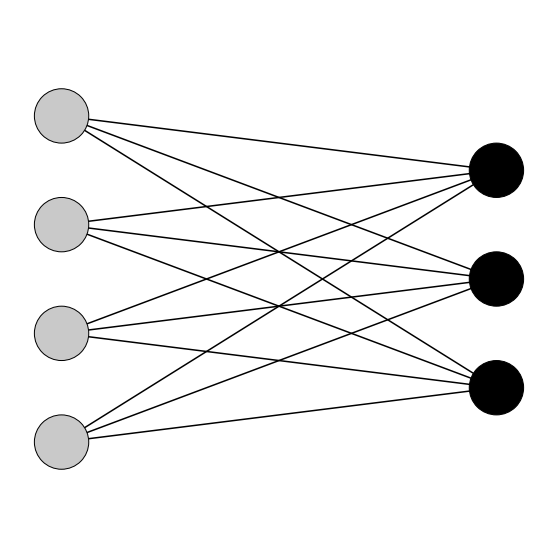

In [18]:
plot_network_arch(np.array(mlpc.network_structure)[:, 1], activations=None)

In [41]:
# 78

In [42]:
# wtc =[]

In [43]:
# for layers_number in range(len(wts)-1):
#     layer_a_units = wts[layers_number][1]
#     layer_b_units = wts[layers_number+1][1]
#     weights_matrix = np.random.rand(layer_a_units, layer_b_units)
#     wtc.append(weights_matrix)

In [44]:
# np.random.rand(3,2)

In [45]:
# wtc[2].shape

In [46]:
mlpc.layer_weight_matrices

[array([[0.5881308 , 0.89771373, 0.89153073, 0.81583748, 0.03588959,
         0.69175758],
        [0.37868094, 0.51851095, 0.65795147, 0.19385022, 0.2723164 ,
         0.71860593],
        [0.78300361, 0.85032764, 0.77524489, 0.03666431, 0.11669374,
         0.7512807 ],
        [0.23921822, 0.25480601, 0.85762553, 0.94977903, 0.56168686,
         0.17878052]]),
 array([[0.77025193, 0.49238104, 0.63125307, 0.83949792, 0.4610394 ,
         0.49794007],
        [0.67941112, 0.65078591, 0.26879524, 0.06732467, 0.77144514,
         0.48098413],
        [0.32920641, 0.51064106, 0.26362883, 0.31051155, 0.62685344,
         0.55744981],
        [0.31857956, 0.39484322, 0.25797459, 0.58224112, 0.16162871,
         0.59813382],
        [0.82582358, 0.15639172, 0.73430052, 0.40864343, 0.7786879 ,
         0.80397057],
        [0.78607144, 0.59228702, 0.6644892 , 0.64656729, 0.42563648,
         0.51356833]]),
 array([[0.50125784, 0.03708381, 0.7081161 ],
        [0.6204306 , 0.77780853, 0.45940

In [47]:
mlpc.layer_biases

[array([[0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0.]])]

In [24]:
np.random.rand(1, 5)

array([[0.16563555, 0.33225194, 0.16543775, 0.91463798, 0.28402501]])

In [20]:
dtr = ['relu', 'softmax', 'sigmoid']

In [22]:
if 'relu' in dtr: print("hi")

hi


In [45]:
dc = []

In [46]:
if dc: print("hit")

In [68]:
b2 = np.array([(1, 12, None), (2, 22, 222)])

In [72]:
list(map(tuple, b2[:, :-1]))

[(1, 12), (2, 22)]

In [71]:
b2[:, :1].tolist()

[[1], [2]]

In [24]:
list(map(tuple, b2[:, :-1]))

[(1, 12), (2, 22)]

In [39]:
a1 = np.array([[4, 20, 50, 100],
               [5, 27, 50, 120],
               [7, 23, 50, 130],
               [10, 22, 50, 140],
               [3, 24, 50, 150]])

In [47]:
a3 = np.array([[1], [2]])

In [48]:
a3.shape

(2, 1)

In [34]:
def standardized(x): # Normalize with mean 0 and std-dev of 1, also called z-score 
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    stdz_x = np.divide((x - x_mean), x_std, where=x_std!=0)
    return stdz_x

In [35]:
a2 = standardized(a1)

In [36]:
a2

array([[-0.72524067, -1.38218948,  0.        , -1.62746694],
       [-0.32232919,  1.64135001,  0.        , -0.46499055],
       [ 0.48349378, -0.08638684,  0.        ,  0.11624764],
       [ 1.69222822, -0.51832106,  0.        ,  0.69748583],
       [-1.12815215,  0.34554737,  0.        ,  1.27872403]])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [30]:
print(scaler.fit(a1))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [32]:
print(scaler.mean_)

[  5.8  23.2  50.  128. ]


In [33]:
print(scaler.transform(a1))

[[-0.72524067 -1.38218948  0.         -1.62746694]
 [-0.32232919  1.64135001  0.         -0.46499055]
 [ 0.48349378 -0.08638684  0.          0.11624764]
 [ 1.69222822 -0.51832106  0.          0.69748583]
 [-1.12815215  0.34554737  0.          1.27872403]]


In [65]:
b1 = [(1, 20), (2, 30), (4, 40), (8, 10)]

In [67]:
np.array(b1)[:, 1]

array([20, 30, 40, 10])

In [ ]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # Seed the random number generator
        np.random.seed(1)

        # Set synaptic weights to a 3x1 matrix,
        # with values from -1 to 1 and mean 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            output = self.think(training_inputs)

            # Calculate the error rate
            error = training_outputs - output

            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            # Adjust synaptic weights
            self.synaptic_weights += adjustments

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    # Initialize the single neuron neural network
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set, with 4 examples consisting of 3
    # input values and 1 output value
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    # Train the neural network
    neural_network.train(training_inputs, training_outputs, 10000)

    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    A = str(input("Input 1: "))
    B = str(input("Input 2: "))
    C = str(input("Input 3: "))
    
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A, B, C])))

In [ ]:
        # Save input layer size
        self.network_structure.append((len(self.network_structure), X.shape[1]))
        # Save hidden layer sizes
        if self.hidden_layers_config:
            self.network_structure.extend(list(map(tuple, np.array(self.hidden_layers_config)[:, :-1])))
#         if hidden_layer_sizes != None:
#             for hidden_layer_size in hidden_layer_sizes:
#                 layer_number = len(self.network_structure) + 1
#                 self.network_structure.append((layer_number, hidden_layer_size))
#                 # Also append shape to hidden_layers_shape
#                 self.hidden_layers_shape.append(self.network_structure[-1])
        # Save output layer size
        self.label_values = np.unique(y)
        self.network_structure.append((len(self.network_structure)+1, self.label_values.size))  